## Problem 1: Logistic Regression via SGD

![](images/problem1.png)

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
N, p = 30, 20
np.random.seed(0)
X = np.random.rand(N, p)
Y = 2*np.random.randint(2, size = N) - 1

In [3]:
def Logistic_loss(x):
  return np.mean([np.log(1 + np.exp(-Y[i] * X[i]@x)) for i in range(N)])

def Logistic_loss_prime(x, i):
  return -Y[i] * X[i] / (1 + np.exp(Y[i] * X[i]@x))

def Logistic_SGD(x0, iter):
  alpha = 0.01
  x = deepcopy(x0)
  log = []
  for _ in range(iter):
    idx = np.random.randint(N)
    x -= alpha * Logistic_loss_prime(x, idx)
    log.append(Logistic_loss(x))
  return x, log

Desired theta
[-0.60171427 -0.72603684  0.41741029 -0.18005705  0.38497814  0.30133759
  0.24247939 -0.33755011 -0.33090096  0.67561331  0.33644229  0.77328251
  0.64082267 -0.01163012 -0.21313746 -0.58483806  0.08321223 -0.38067398
 -0.46999966 -0.24305025]


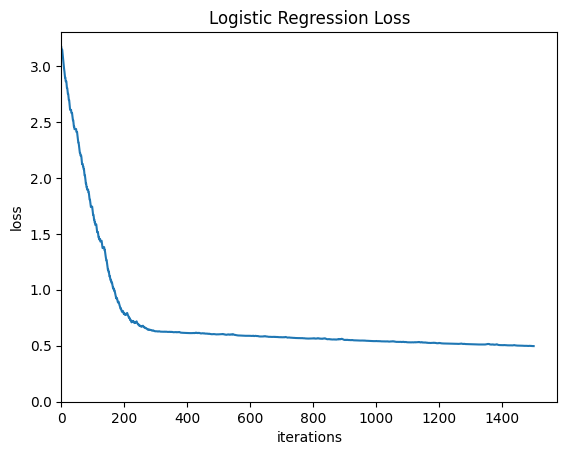

In [4]:
x0 = np.random.rand(p)
x, log = Logistic_SGD(x0, 1500)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('Logistic Regression Loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, )
plt.xlim(0, )
plt.show()

Desired theta
[-1.56777268 -2.31920996  1.34668028 -0.32320696 -0.32467718  1.9002823
  0.63021021 -1.57054141 -1.18708447  1.9590048   0.64841151  1.8803886
  1.41002926  0.12564327  0.2337997  -1.727479    1.08180633 -0.6875224
 -1.4662505  -0.53361824]


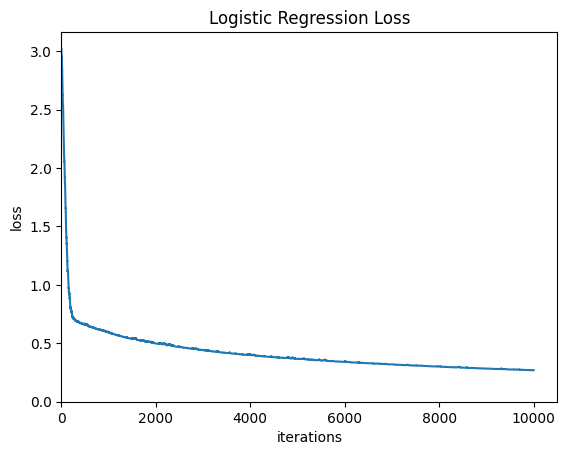

In [5]:
x0 = np.random.rand(p)
x, log = Logistic_SGD(x0, 10000)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('Logistic Regression Loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, )
plt.xlim(0, )
plt.show()

Overfitting 이 일어나는 것으로 추정되어 Train-Test Split을 진행하여 다시 계산해보았다.

### With Train-Test Split

In [6]:
train_X = X[:20]
train_Y = Y[:20]
test_X = X[20:]
test_Y = Y[20:]
train_N = len(train_Y)
test_N = len(test_Y)

In [7]:
def Logistic_loss_splitted(x):
  return np.mean([np.log(1 + np.exp(-test_Y[i] * test_X[i]@x)) for i in range(test_N)])

def Logistic_loss_prime_splitted(x, i):
  return -train_Y[i] * train_X[i] / (1 + np.exp(train_Y[i] * train_X[i]@x))

def Logistic_SGD_splitted(x0, iter):
  alpha = 0.01
  x = deepcopy(x0)
  log = []
  for _ in range(iter):
    idx = np.random.randint(train_N)
    x -= alpha * Logistic_loss_prime_splitted(x, idx)
    log.append(Logistic_loss_splitted(x))
  return x, log

Desired theta
[-0.23508522 -0.35505643  0.00149369  0.14643859  0.56565142  0.30490151
  0.36376073 -0.95055034 -0.97709602  0.28472999  0.21826492  0.339033
  0.91954647  0.48641379 -0.43487008 -0.29106133  0.47361793 -0.56714496
 -0.37012487 -0.76066189]


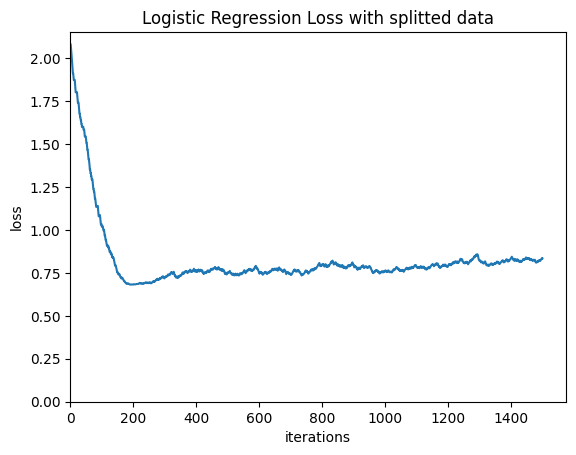

In [8]:
x0 = np.random.rand(p)
x, log = Logistic_SGD_splitted(x0, 1500)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('Logistic Regression Loss with splitted data')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, )
plt.xlim(0, )
plt.show()

Desired theta
[-1.00384279 -1.3268153   0.61315122  0.8448086   0.7349297   0.49776406
  1.60183944 -2.65686431 -2.51858281  0.04287283  0.47320222  1.27761959
  2.30602895  1.422476   -0.95960294 -1.85110139  2.58441811 -0.55789171
 -0.78119762 -1.75326644]


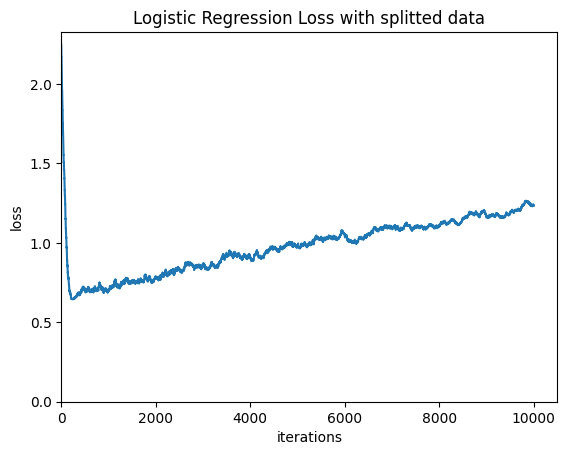

In [9]:
x0 = np.random.rand(p)
x, log = Logistic_SGD_splitted(x0, 10000)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('Logistic Regression Loss with splitted data')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, )
plt.xlim(0, )
plt.show()

역시나 원만하게 loss 가 줄어드는 구간은 Overfitting이 일어나는 구간이었음을 확인할 수 있었다.

# Problem 2: SVM via SGD

![](images/problem2.png)

In [10]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [11]:
N, p = 30, 20
np.random.seed(0)
X = np.random.rand(N, p)
Y = 2*np.random.randint(2, size = N) - 1
lamb = 0.1

In [12]:
def SVM_loss(x):
  return lamb * x@x + np.mean([np.maximum(0, 1 - Y[i] * X[i]@x) for i in range(N)])

def SVM_loss_prime(x, i):
  return 2 * lamb * x - (Y[i] * X[i] * (0 < 1 - Y[i] * X[i]@x))

def SVM_SGD(x0, iter):
  alpha = 0.01
  x = deepcopy(x0)
  log = []
  for _ in range(iter):
    idx = np.random.randint(N)
    x -= alpha * SVM_loss_prime(x, idx)
    log.append(SVM_loss(x))
  return x, log

Desired theta
[-0.28983474 -0.41314039  0.16385732 -0.12801321 -0.01658491  0.22630786
  0.08295174 -0.32721787 -0.2725803   0.28811394  0.06967216  0.3361765
  0.37298432  0.05505637 -0.0392235  -0.180649    0.19300259 -0.2323721
 -0.2432851  -0.18663932]


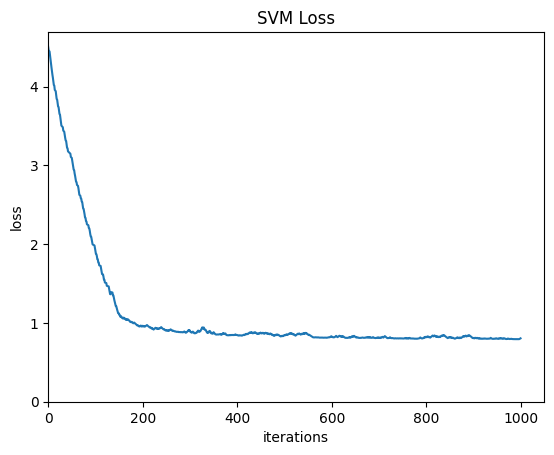

In [13]:
x0 = np.random.rand(p)
x, log = SVM_SGD(x0, 1000)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('SVM Loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.xlim(0, )
plt.ylim(0, )
plt.show()

Desired theta
[-0.33259803 -0.53976849  0.17389476 -0.17947414 -0.08064115  0.21673682
  0.09008468 -0.34885902 -0.3547019   0.2887021   0.09827146  0.43525064
  0.46103097  0.09565377  0.16431244 -0.15547287  0.22088714 -0.27008989
 -0.17601054 -0.15982538]


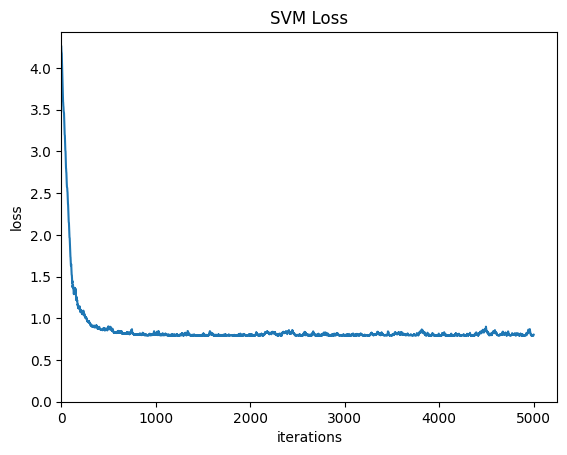

In [14]:
x0 = np.random.rand(p)
x, log = SVM_SGD(x0, 5000)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('SVM Loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.xlim(0, )
plt.ylim(0, )
plt.show()

### With Train-Test Split

In [15]:
train_X = X[:20]
train_Y = Y[:20]
test_X = X[20:]
test_Y = Y[20:]
train_N = len(train_Y)
test_N = len(test_Y)

def SVM_loss_splitted(x):
  return lamb * x@x + np.mean([np.maximum(0, 1 - test_Y[i] * test_X[i]@x) for i in range(test_N)])

def SVM_loss_prime_splitted(x, i):
  return 2 * lamb * x - (train_Y[i] * train_X[i] * (0 < 1 - train_Y[i] * train_X[i]@x))

def SVM_SGD_splitted(x0, iter):
  alpha = 0.01
  x = deepcopy(x0)
  log = []
  for _ in range(iter):
    idx = np.random.randint(train_N)
    x -= alpha * SVM_loss_prime_splitted(x, idx)
    log.append(SVM_loss_splitted(x))
  return x, log

Desired theta
[-0.13433397 -0.40753002 -0.05370527  0.01045259  0.00877037 -0.02311041
  0.19373699 -0.53889028 -0.43316128 -0.11797614 -0.03503835  0.37358235
  0.37518688  0.22619759 -0.12805371 -0.33490205  0.28935418 -0.10134149
 -0.07971959 -0.32393953]


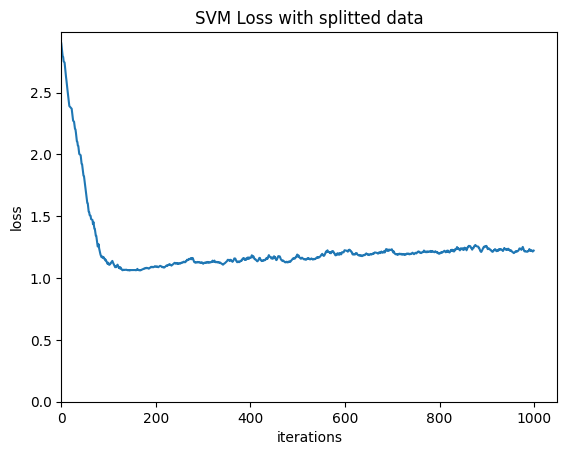

In [16]:
x0 = np.random.rand(p)
x, log = SVM_SGD_splitted(x0, 1000)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('SVM Loss with splitted data')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.xlim(0, )
plt.ylim(0, )
plt.show()

Desired theta
[-0.18467764 -0.40309238  0.02007044  0.06258167  0.08563323  0.07541623
  0.19039669 -0.55784873 -0.41057065 -0.09277241  0.09141089  0.45046912
  0.5055811   0.24967997 -0.10745199 -0.45867366  0.46748427 -0.21710479
 -0.02333168 -0.39383764]


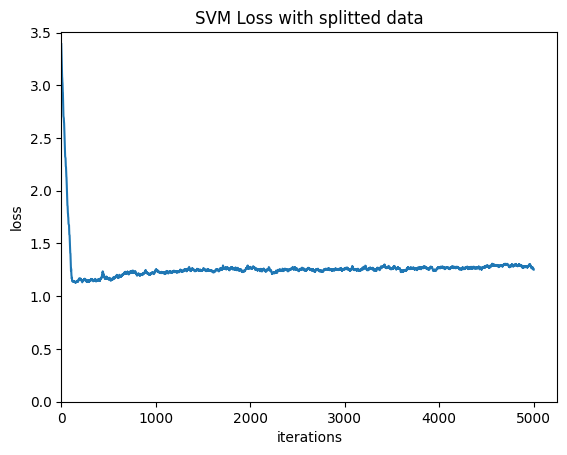

In [17]:
x0 = np.random.rand(p)
x, log = SVM_SGD_splitted(x0, 5000)
print("Desired theta")
print(x)
plt.plot(log)
plt.title('SVM Loss with splitted data')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.xlim(0, )
plt.ylim(0, )
plt.show()

본 환경에서는 Logistic Regression과 다르게 Overfitting이 많이 발생하진 않았음을 확인할 수 있었다.

Problem 1과 2에서 다룬 데이터는 온전히 랜덤하게 생성된 데이터로, 이러한 데이터에서는 근본적으로 예측이 불가능하다. 따라서 이로 인해서 Logistic Regression과 SVM 모두에서 Loss 가 크게 줄어들지 않는 것을 확인할 수 있다. \
그러나 random 하게 생성하는 과정에서 X의 각 성분이 0과 1 사이라는 것과 Y가 1과 -1 중 하나라는 점에서 가지는 규칙으로 인한 부분까지는 학습이 진행되어 Loss가 감소했고, 이후에는 SGD가 non-differentiable한 부분에서 멈추는 것으로 보인다. \
다만, Overfitting이 발생하는 경우에는 Loss가 지속해서 감소하였기에, Train-Test split을 통해 이를 확인하였고 non-differentiable한 부분에서 멈추는 것을 확인하였다.

# Problem 3

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [19]:
N=30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0,:]**2+X[1,:]**2-0.7) 
theta = 0.5
c, s = np.cos(theta), np.sin(theta) 
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]])

Text(0.5, 1.0, 'Simple Plot of Data')

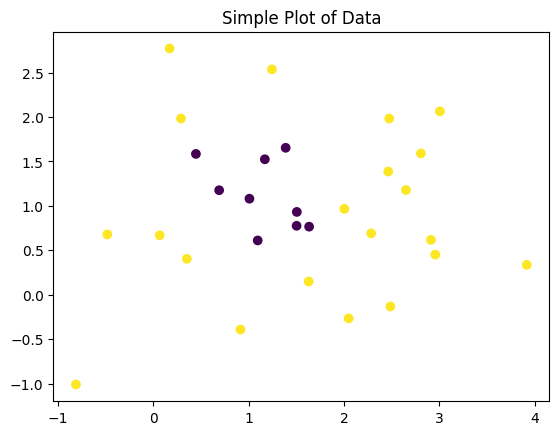

In [20]:
# plot the data
plt.scatter(X[0,:],X[1,:],c=y)
plt.title('Simple Plot of Data')

위 그래프를 통해서 데이터를 관찰해 보았을 때, 노란색 점들과 검은색 점들은 linearly separable하지 않다. 노란색 점들이 검은색 점들을 기준으로 했을 때의 모든 방향에 존재하기 때문이다.

In [21]:
XX = np.vstack((np.ones(N), X[0,:], X[0, :]*X[0, :], X[1,:], X[1,:]*X[1,:])).T
Y = y

SVM을 이용하여 w를 계산해 보겠다.

In [22]:
lamb = 0.001
def SVM_loss(x):
  return lamb * x@x + np.mean([np.maximum(0, 1 - Y[i] * XX[i]@x) for i in range(N)])

def SVM_loss_prime(x, i):
  return 2 * lamb * x - (Y[i] * XX[i] * (0 < 1 - Y[i] * XX[i]@x))

def SVM_SGD(x0, iter):
  alpha = 0.01
  x = deepcopy(x0)
  log = []
  for _ in range(iter):
    idx = np.random.randint(N)
    x -= alpha * SVM_loss_prime(x, idx)
    log.append(SVM_loss(x))
  return x, log

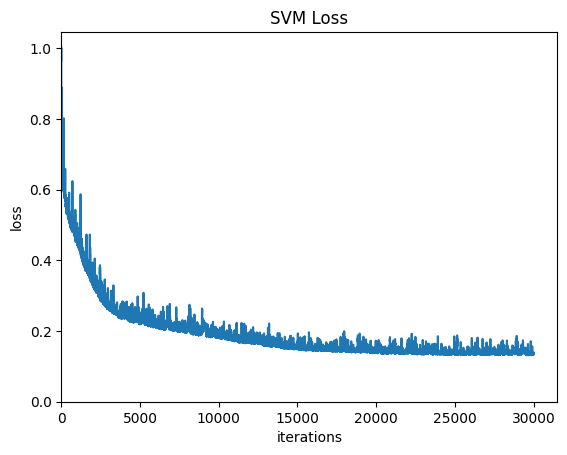

In [23]:
x, log = SVM_SGD(np.zeros(5), 30000)
plt.plot(log)
plt.title('SVM Loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.xlim(0, )
plt.ylim(0, )
plt.show()

Desired Weight
[ 3.49270801 -4.91341662  2.27384321 -4.26797818  1.77374863]


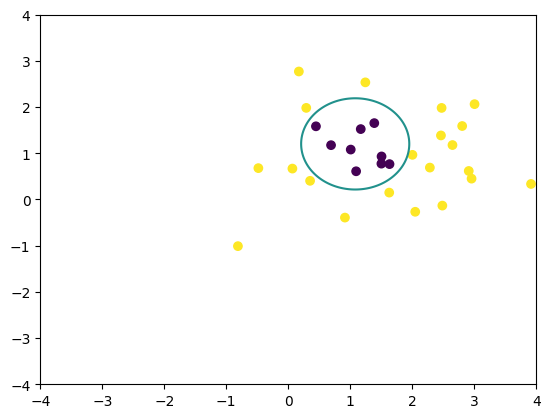

Accuracy
1.0


In [24]:
w = x
print("Desired Weight")
print(w)
xx = np.linspace(-4, 4, 1024)
yy = np.linspace(-4, 4, 1024)
xx , yy = np.meshgrid(xx , yy)
Z = w[0] + (w[1] * xx + w[2] * xx**2) + (w[3] * yy + w[4] * yy**2)
plt.contour(xx , yy , Z, 0)
plt.scatter(X[0,:],X[1,:],c=y)
plt.show()

classified = 0
for i in range(N):
  if Y[i] * XX[i]@w > 0:
    classified += 1
print("Accuracy")
print(classified / N)

위 그래프와 정확도에서 확인할 수 있듯이 SVM을 이용해 계산한 w를 통하여 노란색 점들과 검은색 점들을 linearly separable하게 만들었다. 이는 SVM이 두 클래스를 분리하는 초평면을 찾는다는 점을 보여준다.

# Problem 4: Nonnegativity of KL Divergence

![](images/problem4.png)

# Problem 5: Positivity of KL Divergence

![](images/problem5.png)

# Problem 6: Differentiating 2-layer neural networks

![](images/problem6.png)

# Problem 7: SGD with Two-layer Neural Network

![](images/problem7.png)

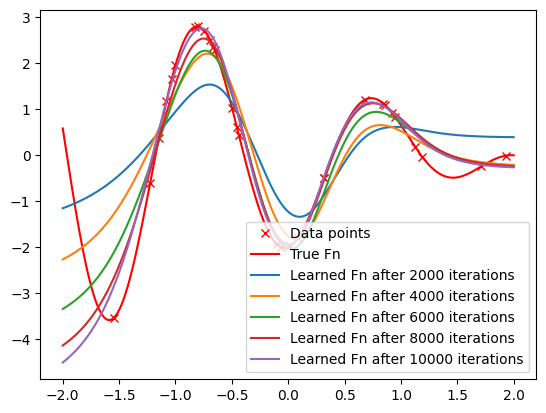

In [25]:
# twolayerSGD.py
import numpy as np
import matplotlib.pyplot as plt

def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :
    return ((f_th(theta, x) - f_true(x)) 
            * np.concatenate((
                sigmoid_prime(theta[0 : p] * np.reshape(x, (-1, 1)) + theta[p : 2*p]) * theta[2*p : 3*p] * np.reshape(x, (-1, 1)), # a
                sigmoid_prime(theta[0 : p] * np.reshape(x, (-1, 1)) + theta[p : 2*p]) * theta[2*p : 3*p], # b
                sigmoid(theta[0 : p] * np.reshape(x, (-1, 1)) + theta[p : 2*p]), # u
                ), axis=1)[0]
    )

xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    idx = np.random.randint(N)
    theta -= alpha * diff_f_th(theta, X[idx])
    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()
# plt.savefig('plot.png')

Iteration이 늘어날수록 점차 True Fn에 가까워지는 모습을 관찰할 수 있다.